In [1]:
#importamos los modulos necesarios
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

C:\Users\alfon\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
#determinamos el portafolio a analisar para la etapa 1
tickers=["GGAL","BBAR","IRS","TEO","TGS"]
data=pd.DataFrame()
for t in tickers:
    data[t]=wb.DataReader(t,data_source="yahoo",start="2003-01-01",end="2007-12-31")["Adj Close"]

In [3]:
data

,GGAL,BBAR,IRS,TEO,TGS
Date,,,,,
2003-01-02,1.952801,1.949206,3.417969,1.380578,0.676484
2003-01-03,2.076637,2.096103,3.548178,1.507131,0.740046
2003-01-06,2.400516,2.288199,3.789064,1.627931,0.785448
2003-01-07,2.381465,2.389896,3.893230,1.702713,0.817229
2003-01-08,2.381465,2.344697,3.893230,1.702713,0.817229
...,...,...,...,...,...
2007-12-24,7.042132,4.915934,9.804690,13.282307,2.665073
2007-12-26,7.176268,5.002504,9.889327,13.334078,2.583350
2007-12-27,7.157106,4.915934,9.602867,13.155756,2.678694


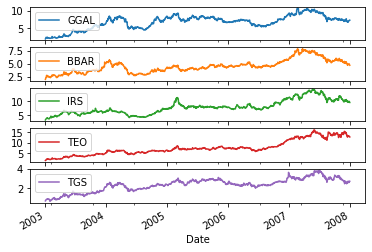

In [4]:
#Vemos como se han comportado en el precio cada una
data.plot(subplots=True)
plt.savefig("C:/Users/alfon/Documents/Etapa1_precios_ind")

In [5]:
#Obtenemos precios Maximos para cada ADR con su Fecha
preciosMax= round (data.max(),2)
fechasMax=data.idxmax()
    

In [6]:
#Armamos la tabla para exponer
tabla=pd.concat([preciosMax,fechasMax],axis=1)
tabla.columns=["Precio Maximo","Fecha PM"]


print (tabla)

      Precio Maximo   Fecha PM
GGAL          10.65 2007-02-20
BBAR           7.89 2007-02-21
IRS           14.01 2007-05-23
TEO           16.31 2007-05-31
TGS            3.85 2007-07-05


In [7]:
#Hacemos lo mismo para precios Minimos
preciosMin= round (data.min(),2)
fechasMin=data.idxmin()
tablaMin=pd.concat([preciosMin,fechasMin],axis=1)
tablaMin.columns=["Precio Minimo","Fecha PMin"]
    
print (tablaMin)

      Precio Minimo Fecha PMin
GGAL           1.95 2003-01-02
BBAR           1.95 2003-01-02
IRS            3.42 2003-01-02
TEO            1.38 2003-01-02
TGS            0.67 2003-01-28


In [8]:
#Calculamos la suba porcentual de cada ADR en Base al 2003-01-01
data_variaciones=(data/data.iloc[0]-1)*100
data_variaciones

,GGAL,BBAR,IRS,TEO,TGS
Date,,,,,
2003-01-02,0.000000,0.000000,0.000000,0.000000,0.000000
2003-01-03,6.341489,7.536240,3.809528,9.166666,9.395971
2003-01-06,22.926848,17.391330,10.857155,17.916653,16.107386
2003-01-07,21.951247,22.608697,13.904775,23.333338,20.805375
2003-01-08,21.951247,20.289859,13.904775,23.333338,20.805375
...,...,...,...,...,...
2007-12-24,260.617068,152.201867,186.857167,862.083252,293.959706
2007-12-26,267.485958,156.643176,189.333394,865.833216,281.879154
2007-12-27,266.504716,152.201867,180.952397,852.916750,295.973184


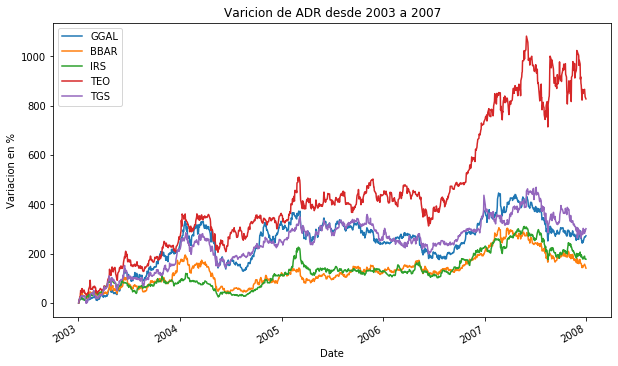

In [9]:
#Graficamos la suba porcentual de lso ADR
data_variaciones.plot(figsize=(10,6))
plt.ylabel("Variacion en %")
plt.title("Varicion de ADR desde 2003 a 2007")
plt.savefig("C:/Users/alfon/Documents/Etapa1_precios_var")


In [10]:
#Vemos el procentaje que subieron los ADR en 5 años
data_return_total=data.iloc[-1]/data.iloc[0]
data_return_total


GGAL    3.719017
BBAR    2.404642
IRS     2.767619
TEO     9.270833
TGS     4.006711
dtype: float64

In [11]:
#Sacamos promedio geometrico anual por año de porcentaje de suba
data_return_a=round(data_return_total**(1/5)-1,2)


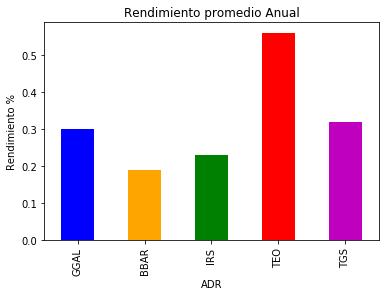

In [12]:
#Graficamos los retornos anuales obtenidos
data_return_a.plot.bar(color=("b","orange","g","r","m"))
plt.title("Rendimiento promedio Anual")
plt.ylabel("Rendimiento %")
plt.xlabel("ADR")
plt.savefig("C:/Users/alfon/Documents/Etapa1_rendimientos")

In [13]:
log_returns=np.log(data/data.shift(1))
log_returns
    

,GGAL,BBAR,IRS,TEO,TGS
Date,,,,,
2003-01-02,NaN,NaN,NaN,NaN,NaN
2003-01-03,0.061485,0.072658,0.037388,0.087706,0.089804
2003-01-06,0.144934,0.087685,0.065685,0.077102,0.059541
2003-01-07,-0.007968,0.043485,0.027120,0.044913,0.039665
2003-01-08,0.000000,-0.019094,0.000000,0.000000,0.000000
...,...,...,...,...,...
2007-12-24,0.037426,0.011385,0.030336,-0.000433,-0.020237
2007-12-26,0.018868,0.017457,0.008595,0.003890,-0.031144
2007-12-27,-0.002674,-0.017457,-0.029394,-0.013464,0.036242


In [14]:
mean=log_returns.mean()*250
mean

GGAL    0.261229
BBAR    0.174503
IRS     0.202464
TEO     0.442894
TGS     0.276048
dtype: float64

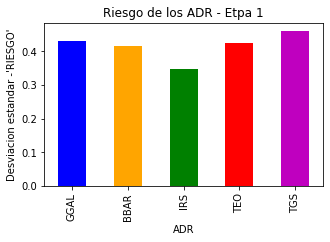

In [15]:
data_stdev=log_returns.std()*250**0.5
data_stdev.plot.bar(color=("b","orange","g","r","m"),figsize=(5,3))
plt.xlabel("ADR")
plt.ylabel("Desviacion estandar -'RIESGO'")
plt.title("Riesgo de los ADR - Etpa 1")
plt.savefig("C:/Users/alfon/Documents/Etapa1_riesgos")

In [16]:
data_var=log_returns.var()
data_var

GGAL    0.000747
BBAR    0.000690
IRS     0.000481
TEO     0.000719
TGS     0.000853
dtype: float64

In [17]:
cov_matrix=log_returns.cov()*250
cov_matrix

,GGAL,BBAR,IRS,TEO,TGS
GGAL,0.186759,0.111932,0.048187,0.084079,0.070318
BBAR,0.111932,0.172525,0.044917,0.088134,0.068513
IRS,0.048187,0.044917,0.120243,0.041149,0.032864
TEO,0.084079,0.088134,0.041149,0.179626,0.072699
TGS,0.070318,0.068513,0.032864,0.072699,0.213143


In [18]:
corr_matrix=log_returns.corr()
corr_matrix

,GGAL,BBAR,IRS,TEO,TGS
GGAL,1.000000,0.623571,0.321555,0.459050,0.352443
BBAR,0.623571,1.000000,0.311857,0.500650,0.357281
IRS,0.321555,0.311857,1.000000,0.279994,0.205287
TEO,0.459050,0.500650,0.279994,1.000000,0.371544
TGS,0.352443,0.357281,0.205287,0.371544,1.000000


In [19]:
data_var_a=data_var*250

In [20]:
#Composicion de los portafolio
weigths=np.array([0.2,0.2,0.2,0.2,0.2])

In [21]:
#rendimineto del portafolio
porf_return=sum(data_return_a*weigths)
porf_return

0.32

In [22]:
#VArianza del portafolio
porf_variance=np.dot(weigths.T,np.dot(cov_matrix,weigths))
porf_variance

0.08791526399154498

In [23]:
#Volatilidad del portafolio (Desviacion estandar)
porf_volatility=porf_variance**0.5
porf_volatility

0.2965050825728709

In [24]:
#Desviacion estandar del portafolio
print (str(round(porf_volatility,4)*100)+"%")

29.65%


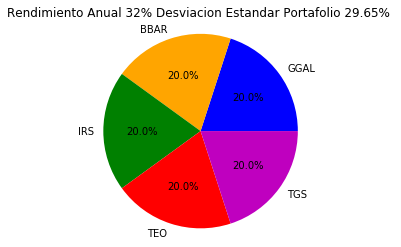

In [25]:
#Grafico del portafolio
plt.pie(weigths,colors=("b","orange","g","r","m"),labels=tickers,autopct='%1.1f%%')
plt.title("Rendimiento Anual 32% Desviacion Estandar Portafolio 29.65% ")
plt.axis("equal")
plt.savefig("C:/Users/alfon/Documents/Etapa1_porfolio")
